In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import scipy.interpolate as inter
import plotly.express as px
from sklearn import preprocessing as skprep
import sklearn
import numba
import timeit
import math
import itertools
from pprint import pprint
from mnk import MNK

In [335]:
def norm(x):
    return (x - x.min()) / (x.max() - x.min())

In [336]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic
    dfn = x.size-1 #define degrees of freedom numerator
    dfd = y.size-1 #define degrees of freedom denominator
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic
    return f, p

In [337]:
koefs = {}

In [338]:
df = pd.read_csv("DataSet5_2.csv", sep=',')
df = df.dropna()
df = df.drop(columns=[
    "count"
])
df = df.drop_duplicates()
df = df.reset_index(drop=True)

predict_column = "registered"

columns = list(df.columns)
columns.remove(predict_column)
columns = [predict_column] + columns
columns = pd.Index(columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     2983 non-null   int64  
 1   humidity    2983 non-null   int64  
 2   registered  2983 non-null   int64  
 3   summer      2983 non-null   int64  
 4   temp        2983 non-null   float64
 5   windspeed   2983 non-null   float64
 6   workingday  2983 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 163.3 KB


In [339]:
df

,holiday,humidity,registered,summer,temp,windspeed,workingday
0,0,81,2,0,10.66,22.0028,1
1,0,54,150,1,18.04,16.9979,1
2,0,40,199,1,37.72,15.0013,1
3,0,88,86,1,22.14,19.0012,1
4,0,74,6,0,6.56,6.0032,1
...,...,...,...,...,...,...,...
2978,0,78,192,1,26.24,7.0015,1
2979,0,71,56,0,14.76,0.0000,0
2980,0,26,142,0,11.48,8.9981,1
2981,0,52,173,1,22.14,0.0000,1


In [340]:
df.nunique()

holiday         2
humidity       85
registered    390
summer          2
temp           45
windspeed      27
workingday      2
dtype: int64

In [341]:
# g = sns.PairGrid(df, diag_sharey=False)
# g.map_upper(sns.scatterplot)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot)
# plt.show()

# Sample

In [342]:
sample = df.sample(
    # 5
    int(len(df) * 0.8)
)
sample = sample.drop_duplicates(subset=[predict_column])
indexes = df.index.delete(df.index.isin(sample.index))
sample = sample.sort_values(by=predict_column)
sample = sample.reset_index(drop=True)
X = sample.loc[0:len(sample), columns[~columns.isin([predict_column])]].to_numpy()
y = sample.loc[0:len(sample), [predict_column]].to_numpy()

In [343]:
sample

,holiday,humidity,registered,summer,temp,windspeed,workingday
0,0,75,0,0,8.20,8.9981,1
1,0,86,1,0,5.74,8.9981,1
2,0,60,2,0,10.66,23.9994,0
3,0,64,3,1,22.96,19.9995,1
4,0,82,4,1,16.40,7.0015,0
...,...,...,...,...,...,...,...
366,0,32,527,1,29.52,8.9981,1
367,0,33,532,1,26.24,0.0000,1
368,0,38,539,1,25.42,16.9979,1
369,0,57,540,1,26.24,12.9980,1


# МНК

In [344]:
funcs = [
    lambda x: x[0] ** 0,
    lambda x: x[0],
    lambda x: x[0] ** 2,
    lambda x: x[1],
    lambda x: x[1] ** 2,
    lambda x: x[2],
    lambda x: x[2] ** 2,
    lambda x: x[3],
    lambda x: x[3] ** 2,
    lambda x: x[4],
    lambda x: x[4] ** 2,
    # lambda x: x[5],
    # lambda x: x[5] ** 2,
    # lambda x: x[6],
    # lambda x: x[6] ** 2,
]
# # funcs[1](df.loc[:, 1:6].to_numpy().T), funcs[16](df.loc[:, 1:6].to_numpy().T)
# mnk = MNK(sample.loc[:, columns[~columns.isin([predict_column])]].to_numpy().T, sample[predict_column].values, funcs)
# # mnk = MNK(df.loc[:, 1:6].to_numpy().T, df[7].values, funcs)
# mnk.c

In [345]:
# for i in range(len(columns)):
#     # x_new = np.linspace(mnk.x.min(), mnk.x.max(), num=500,
#     #                     endpoint=True)  # np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
#     data = df.sort_values(by=columns[i])
#     plt.scatter(df[columns[i]][indexes], df[predict_column][indexes], label='data')
#     plt.scatter(sample[columns[i]], sample[predict_column], label='train')
#     plt.plot(data[columns[i]], mnk(data.loc[:, columns[~columns.isin([predict_column])]].to_numpy().T), label='func', color='green')
#     plt.legend(loc='best')
#     plt.ylabel(predict_column)
#     plt.xlabel(columns[i])
#     ax = plt.gca()
#     # ax.set_xlim([0, 1])
#     # ax.set_ylim([0, 1])
#     # pprint(mnk.c)
#     plt.show()
#
# exp_data = mnk(df.loc[:, columns[~columns.isin([predict_column])]].to_numpy().T)
# exp_data = exp_data.reshape(len(exp_data))

In [346]:
# sns.boxenplot(data=pd.DataFrame({"Predict":exp_data.T, "data": df[predict_column].values.T}))

In [347]:
# print(f"Стьюдент {stats.ttest_ind(exp_data, df[predict_column])}")
# stat = f_test(exp_data, df[predict_column])
# print(f"F-test   stat = {stat[0]}, pvalue = {stat[1]}")
# stat = stats.chi2_contingency([np.abs(exp_data), np.abs(df[predict_column])])
# print(f"X2       stat = {stat[0]}, pvalue = {stat[1]}")

# kNN

In [348]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, y)

KNeighborsRegressor()

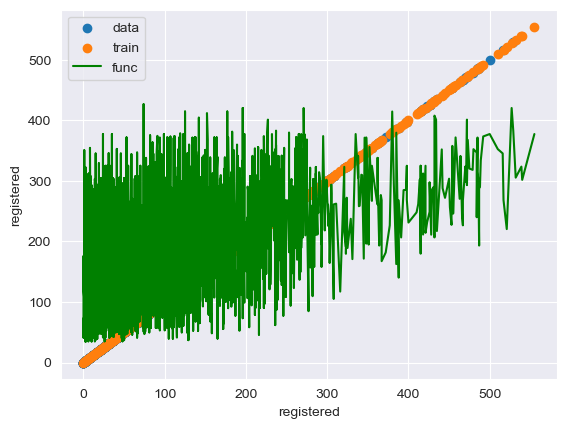

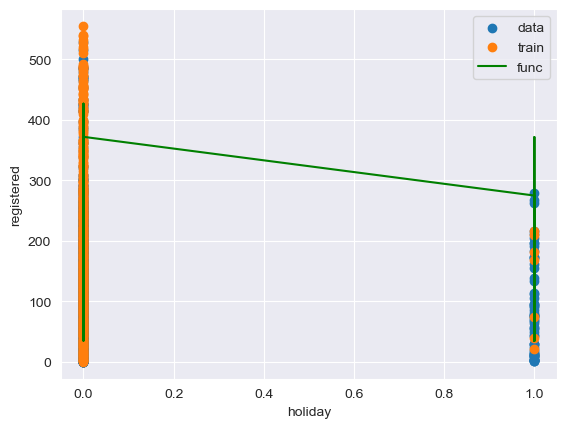

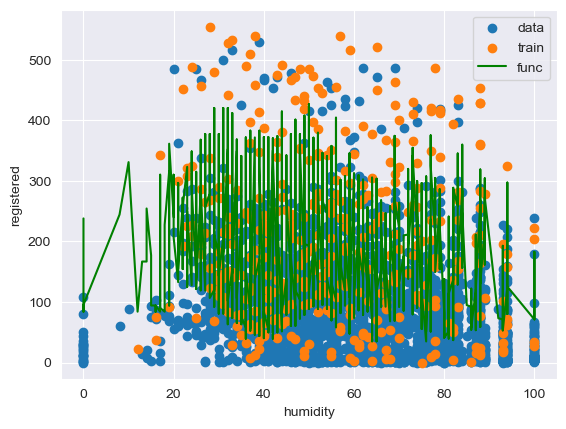

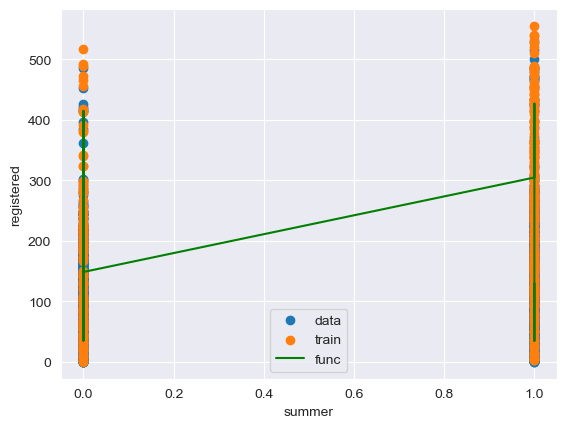

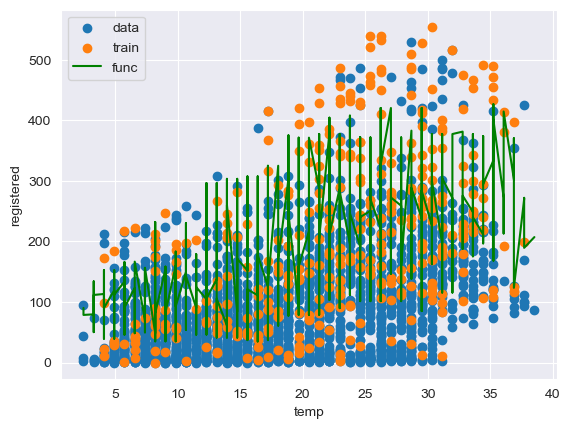

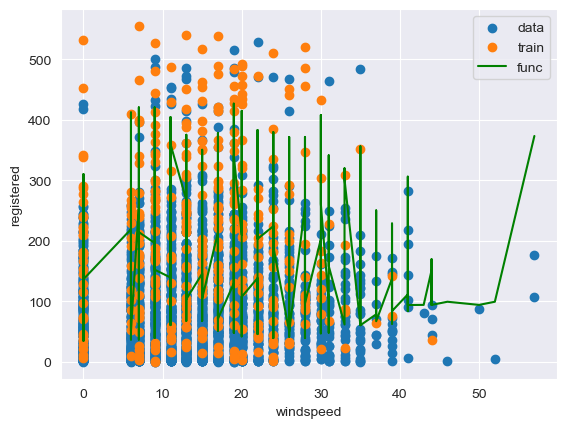

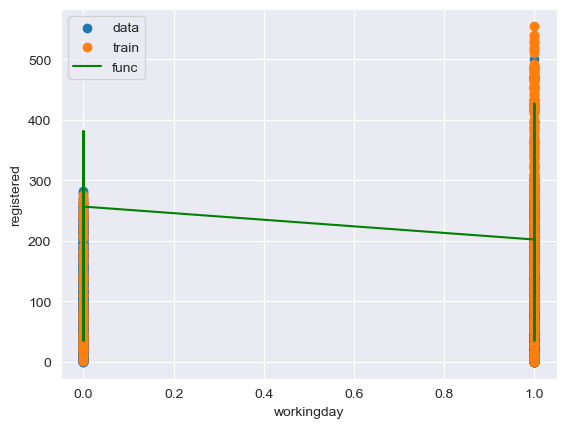

In [349]:
for i in range(len(columns)):
    # x_new = np.linspace(mnk.x.min(), mnk.x.max(), num=500,
    #                     endpoint=True)  # np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
    data = df.sort_values(by=columns[i])
    plt.scatter(df[columns[i]][indexes], df[predict_column][indexes], label='data')
    plt.scatter(sample[columns[i]], sample[predict_column], label='train')
    plt.plot(data[columns[i]], neigh.predict(data.loc[:, columns[~columns.isin([predict_column])]].to_numpy()), label='func',
             color='green')
    plt.legend(loc='best')
    plt.ylabel(predict_column)
    plt.xlabel(columns[i])
    ax = plt.gca()
    # ax.set_xlim([0, 1])
    # ax.set_ylim([0, 1])
    # pprint(mnk.c)
    plt.show()

exp_data = neigh.predict(df.loc[:, columns[~columns.isin([predict_column])]].to_numpy())
exp_data = exp_data.reshape(len(exp_data))

<AxesSubplot:>

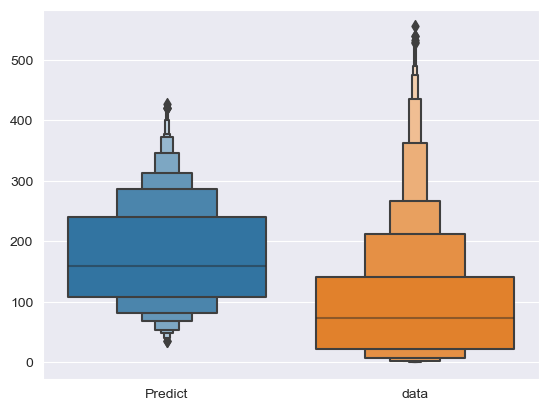

In [350]:
sns.boxenplot(data=pd.DataFrame({"Predict":exp_data.T, "data": df[predict_column].values.T}))

In [351]:
koefs["kNN"] = {}
stat = stats.ttest_ind(exp_data, df[predict_column])
koefs["kNN"]["Стьюдент stat"] = stat[0]
koefs["kNN"]["Стьюдент pvalue"] = stat[1]
print(f"Стьюдент stat = {stat[0]}, pvalue = {stat[1]}")
stat = f_test(exp_data, df[predict_column])
koefs["kNN"]["F-test stat"] = stat[0]
koefs["kNN"]["F-test pvalue"] = stat[1]
print(f"F-test   stat = {stat[0]}, pvalue = {stat[1]}")
stat = stats.chi2_contingency([np.abs(exp_data), np.abs(df[predict_column])])
koefs["kNN"]["X2 stat"] = stat[0]
koefs["kNN"]["X2 pvalue"] = stat[1]
print(f"X2       stat = {stat[0]}, pvalue = {stat[1]}")

koefs["kNN"]["MSE pred"] = sklearn.metrics.mean_squared_error(df[predict_column][indexes], exp_data[indexes])
koefs["kNN"]["R2 pred"] = sklearn.metrics.r2_score(df[predict_column][indexes], exp_data[indexes])
koefs["kNN"]["MSE train"] = sklearn.metrics.mean_squared_error(df[predict_column][~df.index.isin(indexes)], exp_data[~df.index.isin(indexes)])
koefs["kNN"]["R2 train"] = sklearn.metrics.r2_score(df[predict_column][~df.index.isin(indexes)], exp_data[~df.index.isin(indexes)])

Стьюдент stat = 32.72105908172588, pvalue = 3.9390475084300075e-216
F-test   stat = 0.7211370941833662, pvalue = 1.0
X2       stat = 121906.19277903144, pvalue = 0.0


# Lasso

In [352]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5)
lasso.fit(X, y)

Lasso(alpha=0.5)

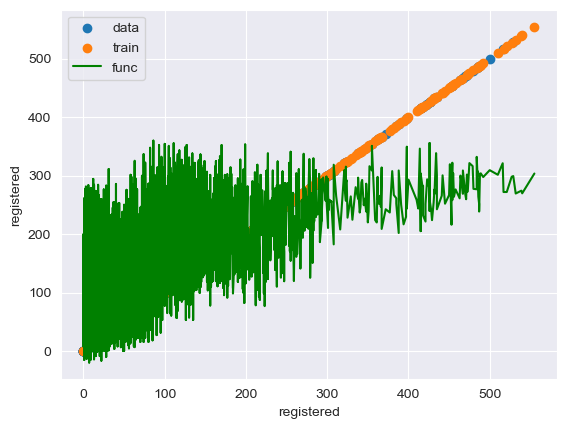

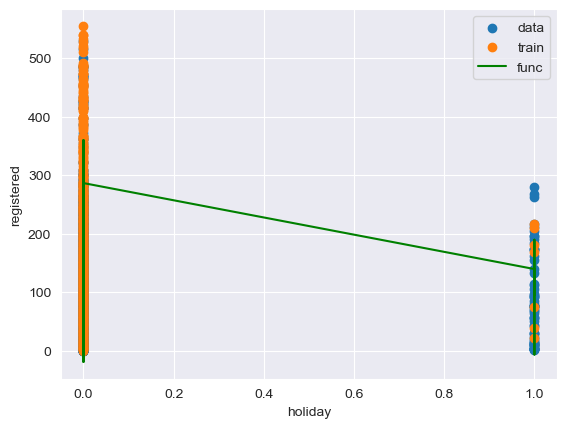

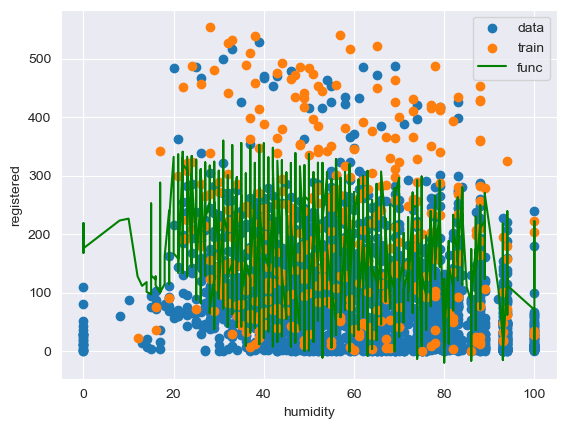

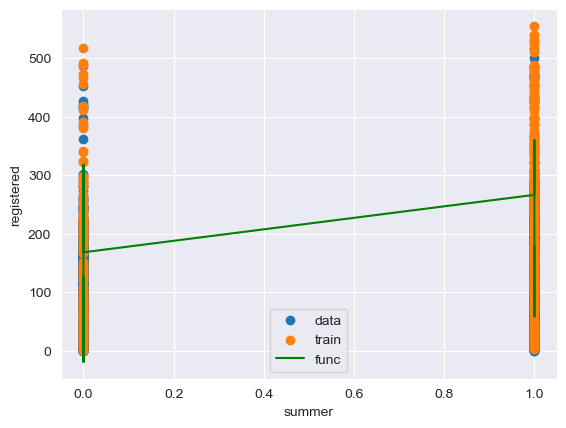

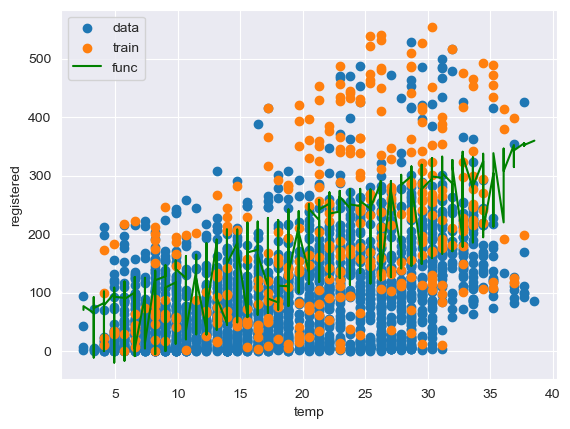

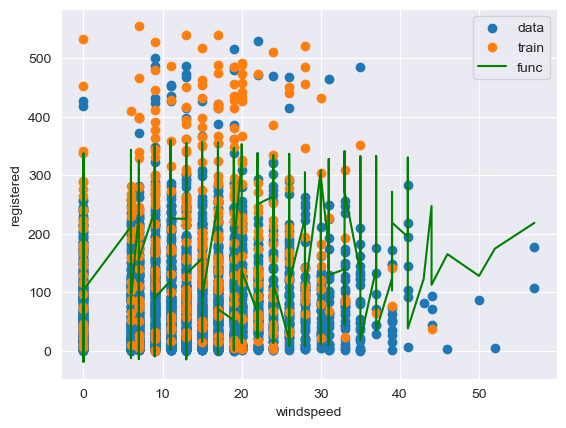

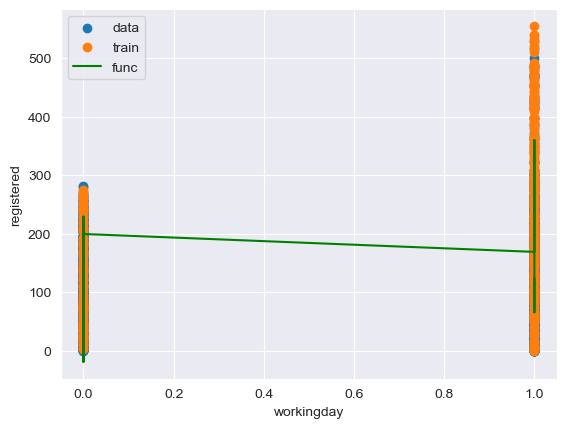

In [353]:
for i in range(len(columns)):
    # x_new = np.linspace(mnk.x.min(), mnk.x.max(), num=500,
    #                     endpoint=True)  # np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
    data = df.sort_values(by=columns[i])
    plt.scatter(df[columns[i]][indexes], df[predict_column][indexes], label='data')
    plt.scatter(sample[columns[i]], sample[predict_column], label='train')
    plt.plot(data[columns[i]], lasso.predict(data.loc[:, columns[~columns.isin([predict_column])]].to_numpy()), label='func',
             color='green')
    plt.legend(loc='best')
    plt.ylabel(predict_column)
    plt.xlabel(columns[i])
    ax = plt.gca()
    # ax.set_xlim([0, 1])
    # ax.set_ylim([0, 1])
    # pprint(mnk.c)
    plt.show()

exp_data = lasso.predict(df.loc[:, columns[~columns.isin([predict_column])]].to_numpy())

<AxesSubplot:>

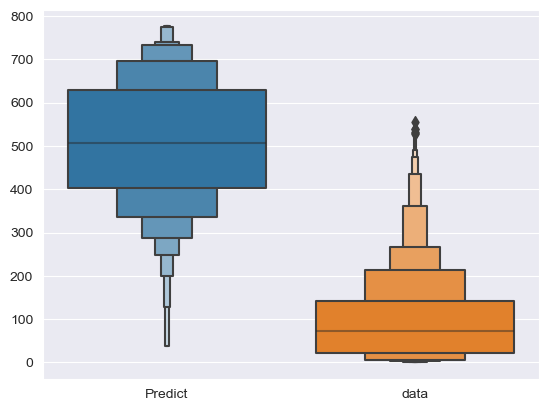

In [354]:
sns.boxenplot(data=pd.DataFrame({"Predict":mnk(df.loc[:, columns[~columns.isin([predict_column])]].to_numpy().T).T, "data": df[predict_column].values.T}))

In [355]:
koefs["Lasso"] = {}
stat = stats.ttest_ind(exp_data, df[predict_column])
koefs["Lasso"]["Стьюдент stat"] = stat[0]
koefs["Lasso"]["Стьюдент pvalue"] = stat[1]
print(f"Стьюдент stat = {stat[0]}, pvalue = {stat[1]}")
stat = f_test(exp_data, df[predict_column])
koefs["Lasso"]["F-test stat"] = stat[0]
koefs["Lasso"]["F-test pvalue"] = stat[1]
print(f"F-test   stat = {stat[0]}, pvalue = {stat[1]}")
stat = stats.chi2_contingency([np.abs(exp_data), np.abs(df[predict_column])])
koefs["Lasso"]["X2 stat"] = stat[0]
koefs["Lasso"]["X2 pvalue"] = stat[1]
print(f"X2       stat = {stat[0]}, pvalue = {stat[1]}")

koefs["Lasso"]["MSE pred"] = sklearn.metrics.mean_squared_error(df[predict_column][indexes], exp_data[indexes])
koefs["Lasso"]["R2 pred"] = sklearn.metrics.r2_score(df[predict_column][indexes], exp_data[indexes])
koefs["Lasso"]["MSE train"] = sklearn.metrics.mean_squared_error(df[predict_column][~df.index.isin(indexes)], exp_data[~df.index.isin(indexes)])
koefs["Lasso"]["R2 train"] = sklearn.metrics.r2_score(df[predict_column][~df.index.isin(indexes)], exp_data[~df.index.isin(indexes)])

Стьюдент stat = 29.377936325946674, pvalue = 2.6941747374590075e-177
F-test   stat = 0.6343401958917968, pvalue = 1.0
X2       stat = 114503.14619653567, pvalue = 0.0


# Ridge

In [356]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)
ridge.fit(X, y)

Ridge(alpha=0.5)

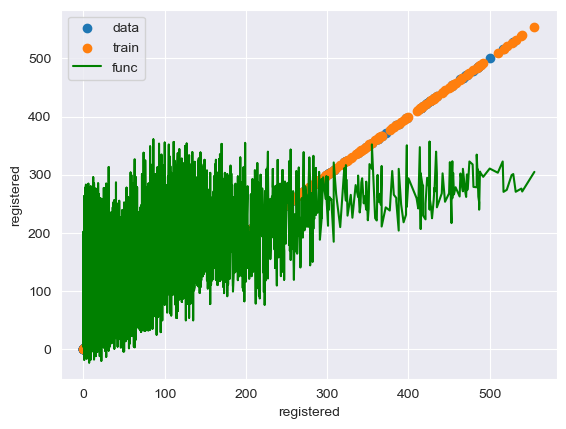

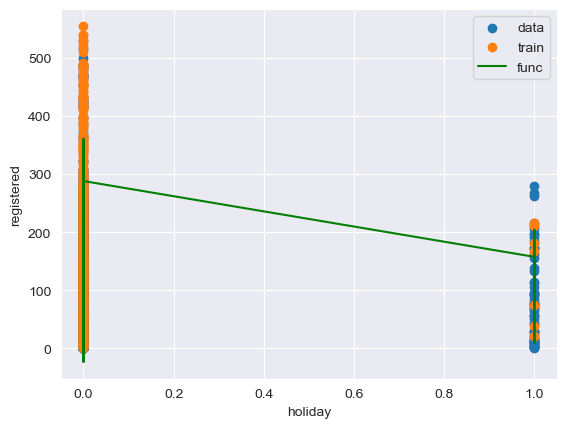

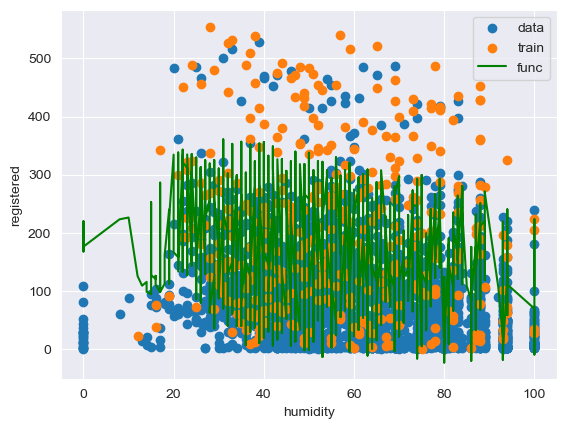

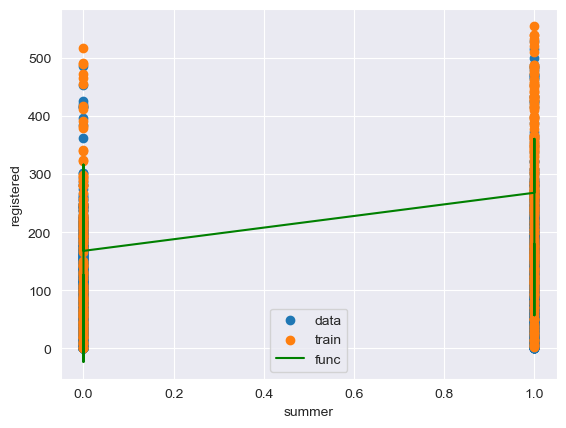

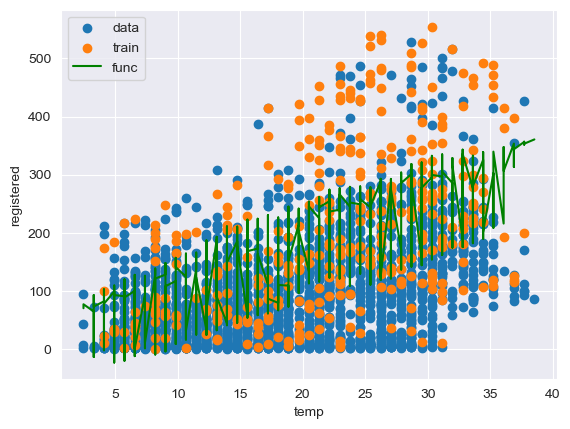

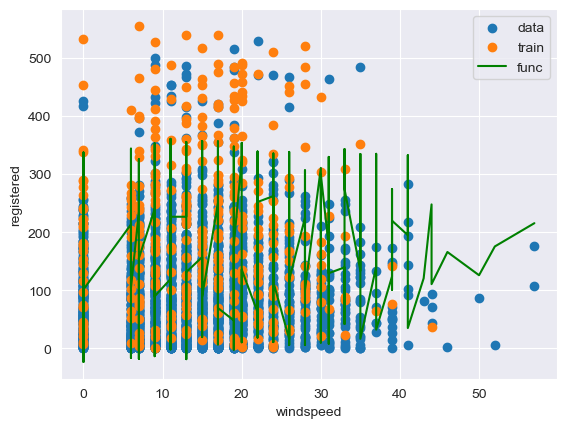

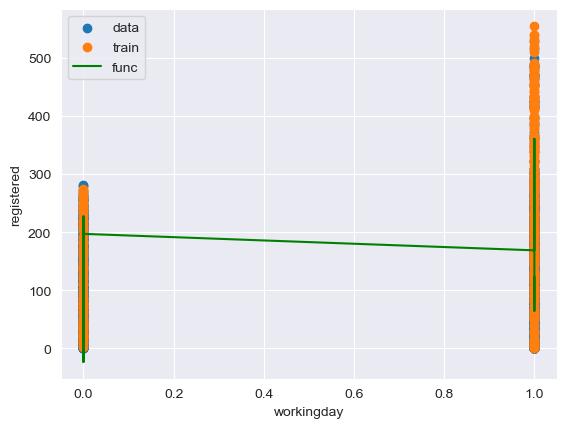

In [357]:
for i in range(len(columns)):
    # x_new = np.linspace(mnk.x.min(), mnk.x.max(), num=500,
    #                     endpoint=True)  # np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
    data = df.sort_values(by=columns[i])
    plt.scatter(df[columns[i]][indexes], df[predict_column][indexes], label='data')
    plt.scatter(sample[columns[i]], sample[predict_column], label='train')
    plt.plot(data[columns[i]], ridge.predict(data.loc[:, columns[~columns.isin([predict_column])]].to_numpy()), label='func',
             color='green')
    plt.legend(loc='best')
    plt.ylabel(predict_column)
    plt.xlabel(columns[i])
    ax = plt.gca()
    # ax.set_xlim([0, 1])
    # ax.set_ylim([0, 1])
    # pprint(mnk.c)
    plt.show()

exp_data = ridge.predict(df.loc[:, columns[~columns.isin([predict_column])]].to_numpy())
exp_data = exp_data.reshape(len(exp_data))

<AxesSubplot:>

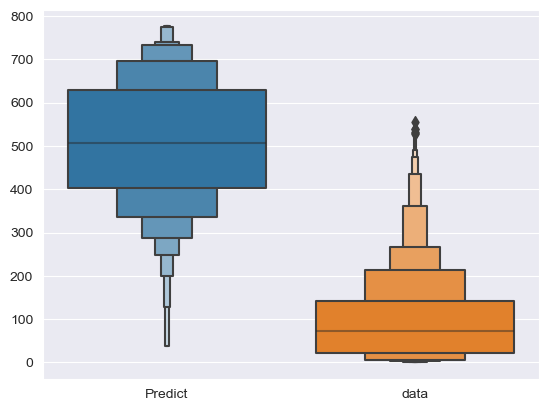

In [358]:
sns.boxenplot(data=pd.DataFrame({"Predict":mnk(df.loc[:, columns[~columns.isin([predict_column])]].to_numpy().T).T, "data": df[predict_column].values.T}))

In [359]:
koefs["Ridge"] = {}
stat = stats.ttest_ind(exp_data, df[predict_column])
koefs["Ridge"]["Стьюдент stat"] = stat[0]
koefs["Ridge"]["Стьюдент pvalue"] = stat[1]
print(f"Стьюдент stat = {stat[0]}, pvalue = {stat[1]}")
stat = f_test(exp_data, df[predict_column])
koefs["Ridge"]["F-test stat"] = stat[0]
koefs["Ridge"]["F-test pvalue"] = stat[1]
print(f"F-test   stat = {stat[0]}, pvalue = {stat[1]}")
stat = stats.chi2_contingency([np.abs(exp_data), np.abs(df[predict_column])])
koefs["Ridge"]["X2 stat"] = stat[0]
koefs["Ridge"]["X2 pvalue"] = stat[1]
print(f"X2       stat = {stat[0]}, pvalue = {stat[1]}")

koefs["Ridge"]["MSE pred"] = sklearn.metrics.mean_squared_error(df[predict_column][indexes], exp_data[indexes])
koefs["Ridge"]["R2 pred"] = sklearn.metrics.r2_score(df[predict_column][indexes], exp_data[indexes])
koefs["Ridge"]["MSE train"] = sklearn.metrics.mean_squared_error(df[predict_column][~df.index.isin(indexes)], exp_data[~df.index.isin(indexes)])
koefs["Ridge"]["R2 train"] = sklearn.metrics.r2_score(df[predict_column][~df.index.isin(indexes)], exp_data[~df.index.isin(indexes)])

Стьюдент stat = 29.14644352698405, pvalue = 1.013843438980091e-174
F-test   stat = 0.6467544349766473, pvalue = 1.0
X2       stat = 114595.94347945527, pvalue = 0.0


In [360]:
koefs

{'kNN': {'Стьюдент stat': 32.72105908172588,
  'Стьюдент pvalue': 3.9390475084300075e-216,
  'F-test stat': 0.7211370941833662,
  'F-test pvalue': 1.0,
  'X2 stat': 121906.19277903144,
  'X2 pvalue': 0.0,
  'MSE pred': 16290.481087289434,
  'R2 pred': -1.415182991963766,
  'MSE train': 10902.839784366575,
  'R2 train': 0.42818543562196654},
 'Lasso': {'Стьюдент stat': 29.377936325946674,
  'Стьюдент pvalue': 2.6941747374590075e-177,
  'F-test stat': 0.6343401958917968,
  'F-test pvalue': 1.0,
  'X2 stat': 114503.14619653567,
  'X2 pvalue': 0.0,
  'MSE pred': 13317.7877385189,
  'R2 pred': -0.9744594566793323,
  'MSE train': 12410.570214292036,
  'R2 train': 0.34911042066819764},
 'Ridge': {'Стьюдент stat': 29.14644352698405,
  'Стьюдент pvalue': 1.013843438980091e-174,
  'F-test stat': 0.6467544349766473,
  'F-test pvalue': 1.0,
  'X2 stat': 114595.94347945527,
  'X2 pvalue': 0.0,
  'MSE pred': 13346.88572081803,
  'R2 pred': -0.9787734454174646,
  'MSE train': 12400.390019363402,
  'R